In [1]:
#1. Import Library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# __K-MEANS__

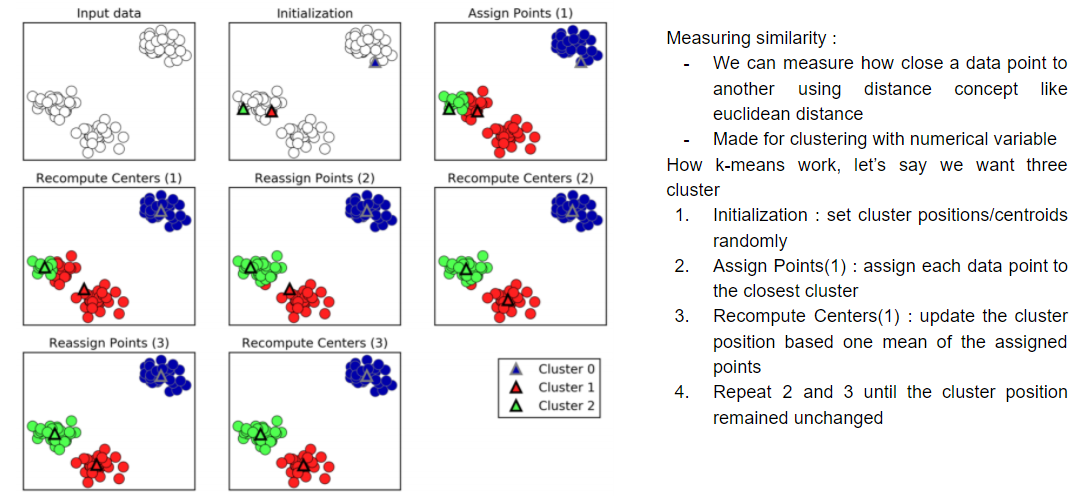

In [2]:
#1. Membuat data sample

X, y = make_blobs(random_state = 42)

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


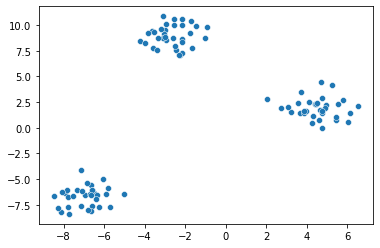

In [3]:
#2. membuats scatterplot untuk melihat berapa cluster secara subjektif

sns.scatterplot(X[:,0], X[:,1])

plt.show()
#terlihat 3 cluster

In [4]:
#3. Membuat ML clustering (memakai 3 cluster sesuai subjektif kita diatas)

#kmeans clustering hanya fit pake x saja

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [5]:
#melihat label (tidak terlalu mementingkan label)

kmeans.labels_

array([1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

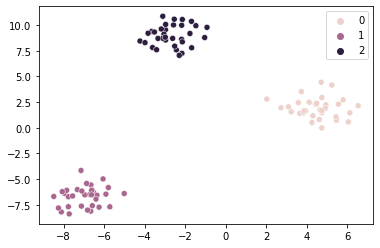

In [6]:
#tapi label dalam clustering penting untuk melihat konsistensi cluster

sns.scatterplot(X[:,0], X[:,1], hue = kmeans.labels_)

In [7]:
#insert picture

In [8]:
#1. Load dataset

df = pd.read_csv('ilustrasi k means.csv', sep = ';')
df

,tinggibadan,tinggibadanistri
0,175,175
1,178,178
2,175,166
3,180,179
4,185,181
5,178,163
6,175,158
7,181,154
8,168,155
9,171,154


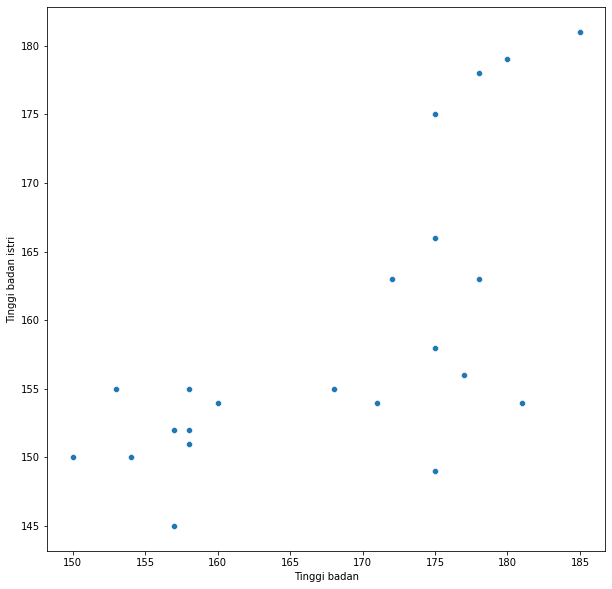

In [9]:
#2. Membuat visualisasi data

plt.figure(figsize = (10,10))
sns.scatterplot(x = 'tinggibadan', y='tinggibadanistri', data = df)

plt.ylabel('Tinggi badan istri')
plt.xlabel('Tinggi badan')
plt.show()

In [14]:
#Menentukan variabel

X = df.copy()

In [16]:
#3. Mencari optimal number of cluster (elbow method)

number_of_clusters = range(2,11) #8kmeans
clusterings = [KMeans(n_clusters = k).fit(X) for k in number_of_clusters] #melatih kmeans
centroids = [k.cluster_centers_ for k in clusterings] #mencari centroid

centroids #selalu berupa nilai x dan y
#Hasil dari number cluster 2 itu di array pertama, jadi isinya centroid cluster1 dan centroid cluster 1
#array ke-2 itu hasil cluster 3

[array([[159.91666667, 151.83333333],
        [177.6       , 167.3       ]]),
 array([[156.11111111, 151.55555556],
        [179.5       , 178.25      ],
        [174.66666667, 157.55555556]]),
 array([[175.        , 164.        ],
        [156.11111111, 151.55555556],
        [179.5       , 178.25      ],
        [174.5       , 154.33333333]]),
 array([[177.66666667, 156.        ],
        [156.11111111, 151.55555556],
        [179.5       , 178.25      ],
        [175.        , 164.        ],
        [171.33333333, 152.66666667]]),
 array([[175.        , 164.        ],
        [157.33333333, 153.16666667],
        [177.        , 154.25      ],
        [179.5       , 178.25      ],
        [169.5       , 154.5       ],
        [153.66666667, 148.33333333]]),
 array([[158.2       , 152.8       ],
        [175.        , 164.        ],
        [177.66666667, 177.33333333],
        [177.66666667, 156.        ],
        [171.33333333, 152.66666667],
        [153.5       , 150.        ],
  

In [29]:
# mencari innersia secara manual (Aneh kata bapaknya)

from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D, axis= 1) for D in D_k]
dist = [np.min(D, axis = 1) for D in D_k]
avgWithinSS = [sum(d)/ X.shape[0] for d in dist]

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


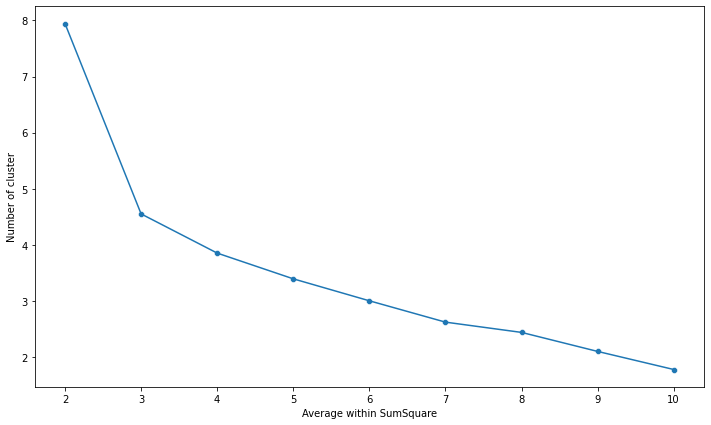

In [30]:
# Membuat plot inersia 

plt.figure(figsize = (12, 7))
sns.lineplot(number_of_clusters, avgWithinSS)
sns.scatterplot(number_of_clusters, avgWithinSS)

plt.xticks(number_of_clusters)

plt.ylabel('Number of cluster')
plt.xlabel('Average within SumSquare')
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


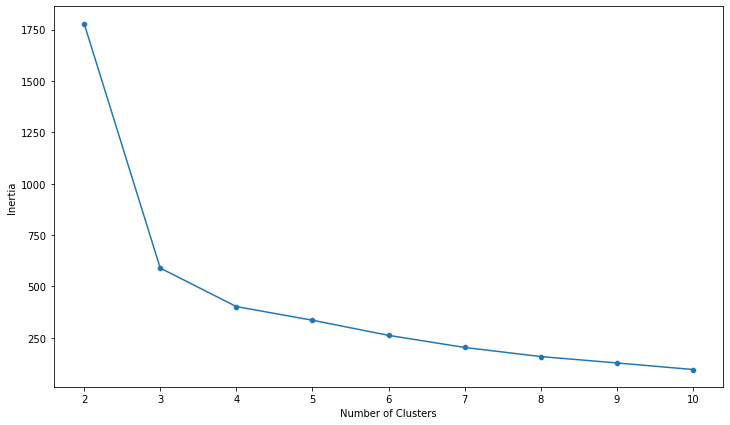

In [31]:
#4. Mencari innersia (gak manual) dan membuat plot

number_of_clusters = range(2, 11)

inertia = [KMeans(n_clusters=k).fit(X).inertia_ for k in number_of_clusters]

plt.figure(figsize=(12,7))

sns.lineplot(number_of_clusters, inertia)
sns.scatterplot(number_of_clusters, inertia)

plt.xticks(number_of_clusters)

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


__cluster yg paling bagus itu grafik setelah saat jatuh, hingga sebelum melandaiPaling bagus 3 atau 4, lalu dicheck dengan silhouette__

In [32]:
#contoh menghitung silhouette score dengan dataset sederhana

kmeans = KMeans(n_clusters =2)
kmeans.fit(X)

labels = kmeans.labels_
silhouette_score(X, labels, metric = 'euclidean')

#hasilnya lumayan bagus

0.5080353833629737

__Notes:__
<br> Silhouette score semakin mendekati 1, semakin bagus.
<br> mendekati 0 makin jelek.
<br> mendekati -1, berarti missclusctering


#5. Menghitung silhouette score

silhouette_scores = []
number_of_clusters = range(2,11)

for i in number_of_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels, metric='euclidean'))

Ternyata paling bagus 3, kalo mau cek lagi bisa pake plot kmrn

#6. bikin plot dari silhouette

plt.figure(figsize=(12,7))

sns.lineplot(number_of_clusters, silhouette_scores)
sns.scatterplot(number_of_clusters, silhouette_scores)

plt.xticks(number_of_clusters)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.5080353833629737
For n_clusters = 3 The average silhouette_score is : 0.6172319390416597
For n_clusters = 4 The average silhouette_score is : 0.5469497456399819


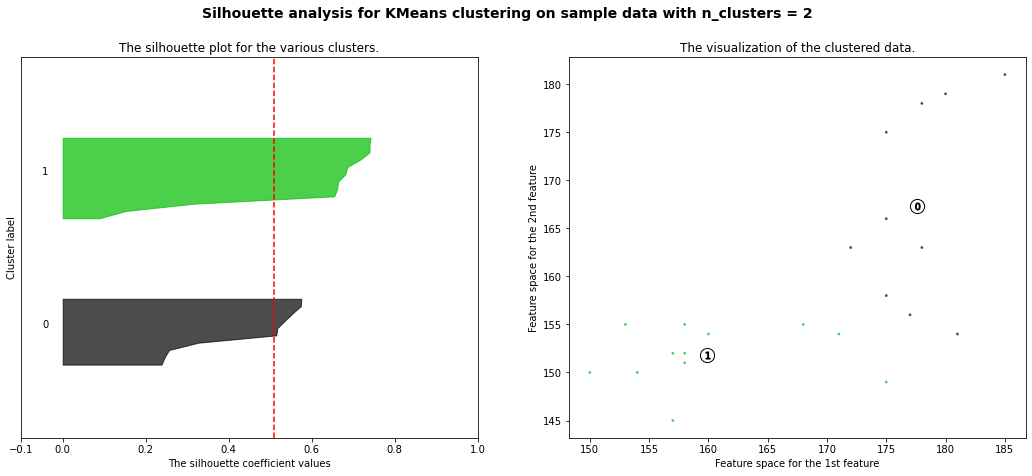

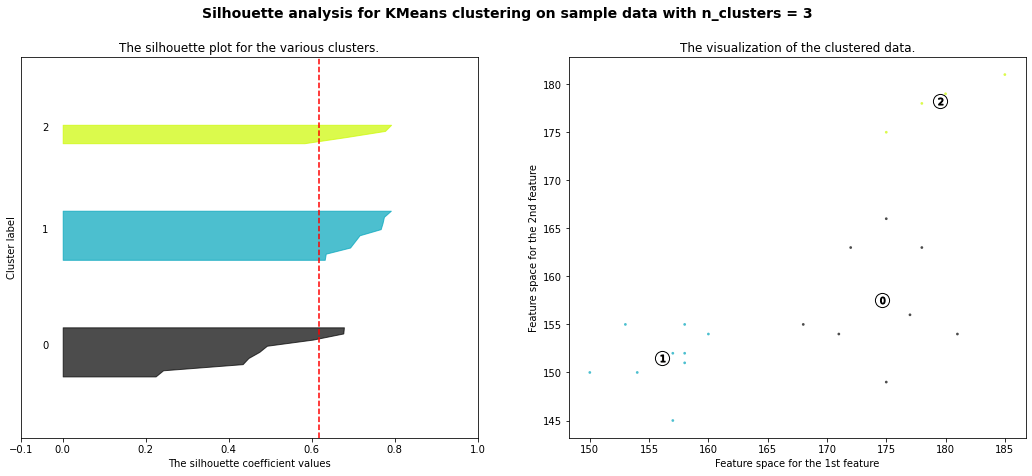

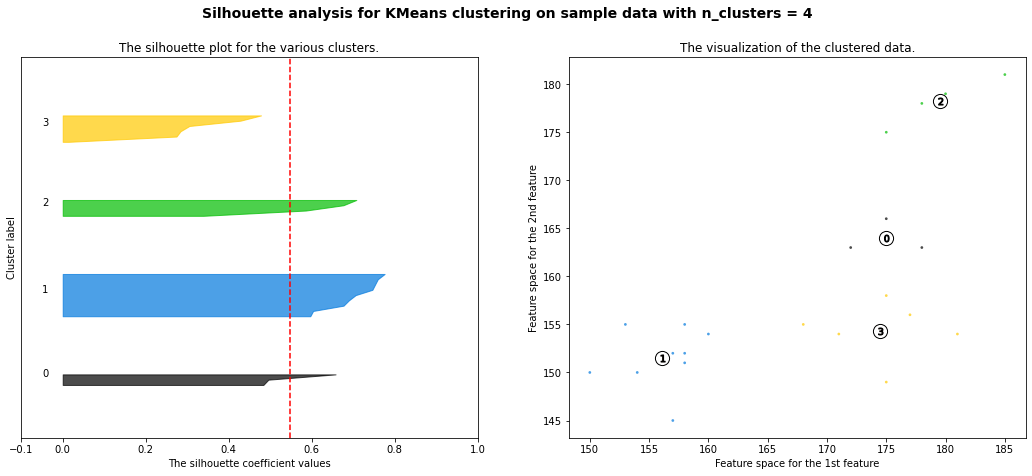

In [33]:
#7. Membuat silhouette plot

for n_clusters in range(2,5):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    #Set y axis
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X['tinggibadan'], X['tinggibadanistri'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

__Notes:__
<br> Yang bagus itu melewati garis merah tiap clusternya.
<br> berarti yg paling bagus, yg clustering 3 ==> lewat dari garis semua dan panjangnya hampir sama semua

In [39]:
#8. Membuat kmeans dengan cluster terbaik yg sudah

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [42]:
#9.dimasukkan ke dalam dataframe

df['cluster'] = kmeans.labels_
df.head()

,tinggibadan,tinggibadanistri,cluster
0,175,175,0
1,178,178,0
2,175,166,2
3,180,179,0
4,185,181,0


In [44]:
#10. Melihat centroid

kmeans.cluster_centers_

array([[179.5       , 178.25      ],
       [156.11111111, 151.55555556],
       [174.66666667, 157.55555556]])

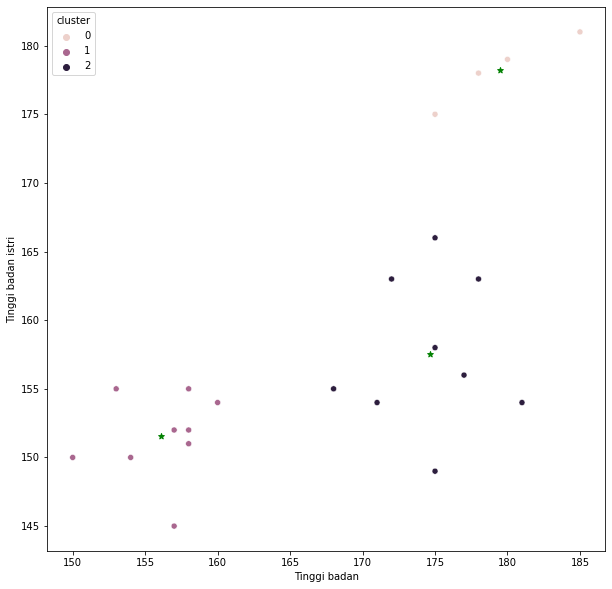

In [46]:
#11. Memvisualisasikan cluster terbaik dalam plot

plt.figure(figsize = (10,10))

sns.scatterplot(x = 'tinggibadan', y='tinggibadanistri', hue = 'cluster' ,data = df)
# sns.scatterplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], hue = [0,1,2], palette = 'Rdbu')
plt.scatter(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], color = 'green', marker = '*')

plt.ylabel('Tinggi badan istri')
plt.xlabel('Tinggi badan')
plt.show()